## Summary Stats for clustered vital 1k + links dataset

**Author:** Jim Maddock

**Last Updated:** 6-8-20

**Description:** Some basic summary stats for clustered dataset produced by edcast, including distribution of cluster sizes and weights (closeness of article to centroid of cluster)

In [37]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

### Notebook Setup
Import data from json file and create pandas dataframe in order to run basic summary stats.  Dataframe creation takes a long time to run.

In [2]:
FILEPATH = '/Users/klogg/research_data/wmf_knowledge_graph/wiki_5-28-20/wiki_65_clusters_6-8-20.json'

with open(FILEPATH) as json_file:
    cluster_65 = json.load(json_file)

In [21]:
df = pd.DataFrame()

for i, cluster in enumerate(cluster_65):
    chunk = []
    for article in cluster_65[cluster]['items']:
        row = {
            'label':cluster_65[cluster]['label'],
            'cluster':cluster_65[cluster]['cluster'],
            'w':article['w'],
            'title':article['title']
        }
        chunk.append(row)
    df = df.append(pd.DataFrame(chunk))
    print('finished cluster: {0}'.format(i))

finished cluster: 0
finished cluster: 1
finished cluster: 2
finished cluster: 3
finished cluster: 4
finished cluster: 5
finished cluster: 6
finished cluster: 7
finished cluster: 8
finished cluster: 9
finished cluster: 10
finished cluster: 11
finished cluster: 12
finished cluster: 13
finished cluster: 14
finished cluster: 15
finished cluster: 16
finished cluster: 17
finished cluster: 18
finished cluster: 19
finished cluster: 20
finished cluster: 21
finished cluster: 22
finished cluster: 23
finished cluster: 24
finished cluster: 25
finished cluster: 26
finished cluster: 27
finished cluster: 28
finished cluster: 29
finished cluster: 30
finished cluster: 31
finished cluster: 32
finished cluster: 33
finished cluster: 34
finished cluster: 35
finished cluster: 36
finished cluster: 37
finished cluster: 38
finished cluster: 39
finished cluster: 40
finished cluster: 41
finished cluster: 42
finished cluster: 43
finished cluster: 44
finished cluster: 45
finished cluster: 46
finished cluster: 47
fi

### Summary Stats

* number of pages and clusters
* distributions of pages per cluster: looks relatively normal, skewed to fewer pages per cluster
* page weights
    * relatively normally distributed and tightly clustered: median ~0.36, std ~0.12
    * mean, quartiles, min, max, std for weights per cluster: median ~0.36, std ~0.12

In [27]:
print('number of pages: {0}'.format(len(df)))
print('number of clusters: {0}'.format(len(df['cluster'].unique())))

number of pages: 62043
number of clusters: 65


### Articles per cluster stats
Distributions of pages per cluster: looks relatively normal, skewed to fewer pages per cluster.  No Cluster smaller than 230 articles.

In [34]:
articles_per_cluster = df.groupby('cluster').size()
articles_per_cluster.describe()

count      65.000000
mean      954.507692
std       401.985196
min       230.000000
25%       729.000000
50%       918.000000
75%      1149.000000
max      2295.000000
dtype: float64

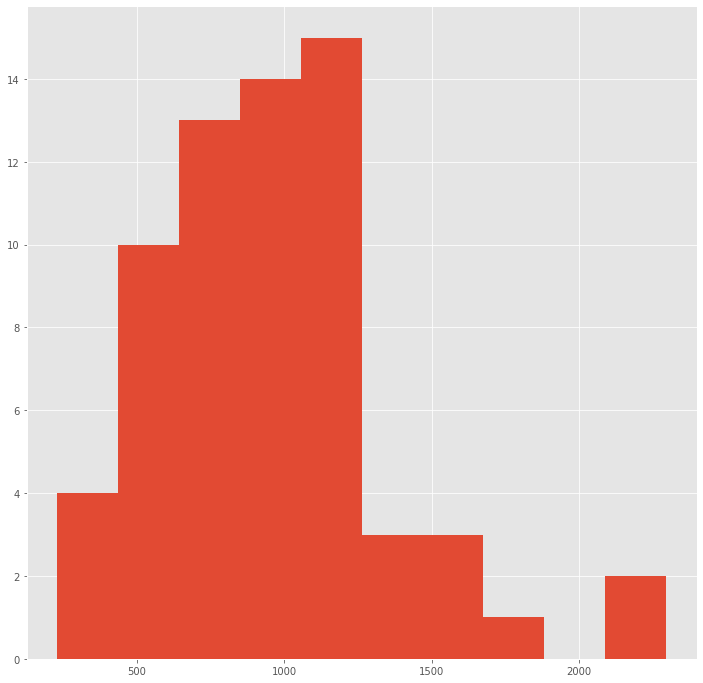

In [71]:
articles_per_cluster.hist(bins=10,figsize=(12,12))

### Weights per cluster stats
* relatively normally distributed and tightly clustered: median ~0.36, std ~0.12
* mean, quartiles, min, max, std for weights per cluster: median ~0.36, std ~0.12

In [61]:
df['w'].describe()

count    62043.000000
mean         0.377517
std          0.124318
min          0.050405
25%          0.286106
50%          0.363927
75%          0.454901
max          0.873621
Name: w, dtype: float64

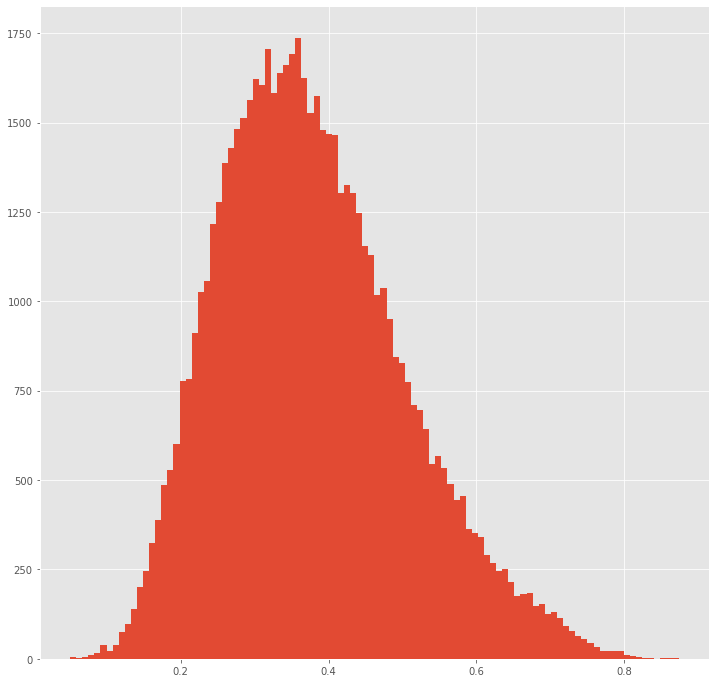

In [64]:
df['w'].hist(bins=100,figsize=(12,12))

In [72]:
weights_per_cluster = df.groupby('label')['w'].describe().sort_values('50%')

In [68]:
weights_per_cluster.describe()

,count,mean,std,min,25%,50%,75%,max
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,954.507692,0.377223,0.121441,0.094793,0.285355,0.368688,0.461825,0.747200
std,401.985196,0.036930,0.023537,0.020358,0.027287,0.040570,0.057798,0.061897
min,230.000000,0.321563,0.080867,0.050405,0.227182,0.291110,0.378590,0.597441
25%,729.000000,0.346849,0.103049,0.081981,0.267290,0.339078,0.417115,0.699430
50%,918.000000,0.373681,0.118944,0.095351,0.280694,0.363597,0.448921,0.751709
75%,1149.000000,0.396682,0.137319,0.109039,0.301391,0.390817,0.497979,0.794647
max,2295.000000,0.472797,0.191477,0.140962,0.371681,0.478205,0.616866,0.873621


### Overview of cluster names, weights, size

In [83]:
df.groupby('label')['w'].describe().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
desert_oblast_comedy_earthquake,338.0,0.335135,0.143578,0.114629,0.227182,0.291110,0.430023,0.752576
christmas_family_list_kinship,468.0,0.326797,0.118944,0.087296,0.233893,0.306855,0.398202,0.727331
river_mountain_peninsula_north,1199.0,0.321563,0.092622,0.078761,0.256023,0.312635,0.378590,0.655415
greek_ancient_roman_list,778.0,0.329336,0.106640,0.090396,0.247311,0.316695,0.401373,0.702117
paper_glass_color_print,853.0,0.324098,0.089620,0.081981,0.255496,0.321006,0.388750,0.597441
company_new_medium_oil,1063.0,0.329345,0.086286,0.110337,0.265994,0.321912,0.383017,0.630123
day_year_calendar_child,749.0,0.338616,0.114535,0.076554,0.254353,0.322265,0.398338,0.737577
acid_carbon_chemistry_reaction,955.0,0.329610,0.095065,0.074058,0.262892,0.325647,0.396868,0.646098
english_word_language_grammar,1095.0,0.337146,0.096431,0.120727,0.266220,0.327570,0.395630,0.694643
